In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

# === set figure styles ===
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="whitegrid")

pd.set_option('display.max_columns', 200)

In [2]:
raw_funding=pd.read_csv('./sea_funding_rounds_2014-20180927.csv') # funding rounds

In [3]:
raw_funding['announced_on'] = pd.to_datetime(raw_funding['announced_on'])
# df['announced_on'].dtype

In [4]:
raw_funding.head(2)

,company_name,country_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,investor_count,company_uuid,funding_round_uuid,investor_names,investor_uuids
0,Ahometo,VNM,Ho Chi Minh,Ho Chi Minh City,seed,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d991b12f-bd4a-e6eb-b4d4-3365ecf0384e,08d65107-9e21-9a4b-c06f-268236904223,{},{}
1,Healint,SGP,NaN,NaN,seed,2014-01-04,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,2a726f19-bb36-5ca4-6531-b422971e24f5,efe6ef75-4fbe-47c9-2980-63aad31a11ac,{},{}


In [5]:
raw_funding.columns

Index(['company_name', 'country_code', 'region', 'city', 'investment_type',
       'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'post_money_valuation_usd',
       'post_money_valuation', 'post_money_currency_code', 'investor_count',
       'company_uuid', 'funding_round_uuid', 'investor_names',
       'investor_uuids'],
      dtype='object')

In [6]:
""" *** Drop irrelevant funding types *** 

['grant' 'equity_crowdfunding' ,'initial_coin_offering','post_ipo_debt','post_ipo_equity','secondary_market', 'product_crowdfunding','non_equity_assistance']  
"""

DROP_INVST_TYPE=['grant','equity_crowdfunding' ,'initial_coin_offering','post_ipo_debt','post_ipo_equity','secondary_market', 'product_crowdfunding','non_equity_assistance']  

raw_funding = raw_funding[~raw_funding['investment_type'].isin(DROP_INVST_TYPE)]
# raw_funding[raw_funding['investment_type'] == 'grant'] # checking

In [7]:
"""Truncate & Groupby Y-M (vs Y-M-D)"""

# https://bit.ly/2NcCX6r, https://bit.ly/2NeqvDc

# - create Year-Month
raw_funding['announced_on_Y-M'] = raw_funding['announced_on'].dt.to_period('M')
# - create Year
raw_funding['announced_on_Y'] = pd.DatetimeIndex(raw_funding['announced_on']).year
# - create Month
# raw_funding['announced_on_M'] = pd.DatetimeIndex(raw_funding['announced_on']).month

raw_funding.head(2)

,company_name,country_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,investor_count,company_uuid,funding_round_uuid,investor_names,investor_uuids,announced_on_Y-M,announced_on_Y
0,Ahometo,VNM,Ho Chi Minh,Ho Chi Minh City,seed,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d991b12f-bd4a-e6eb-b4d4-3365ecf0384e,08d65107-9e21-9a4b-c06f-268236904223,{},{},2014-01,2014
1,Healint,SGP,NaN,NaN,seed,2014-01-04,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,2a726f19-bb36-5ca4-6531-b422971e24f5,efe6ef75-4fbe-47c9-2980-63aad31a11ac,{},{},2014-01,2014


In [8]:
""" Group Operation: count on groups """
raw_funding.groupby('announced_on_Y-M')

In [9]:
raw_funding['announced_on_Y-M'].value_counts().head()
raw_funding['announced_on_Y'].value_counts().head()

2017    681
2016    651
2015    553
2018    411
2014    344
Name: announced_on_Y, dtype: int64

In [10]:
# Create Year-Month Group
group_yr_m = pd.DataFrame(raw_funding['announced_on_Y-M'].value_counts())
group_yr_m.columns = ['counts']
group_yr_m.sort_index(inplace=True)
print(group_yr_m.head())

# Create Year Group
group_yr = pd.DataFrame(raw_funding['announced_on_Y'].value_counts())
group_yr.columns = ['counts']
group_yr.sort_index(inplace=True)

print(group_yr)


         counts
2014-01      20
2014-02      21
2014-03      27
2014-04      21
2014-05      26
      counts
2014     344
2015     553
2016     651
2017     681
2018     411


# 1. Analysis on [the number of funding rounds] by [SEA Countries]

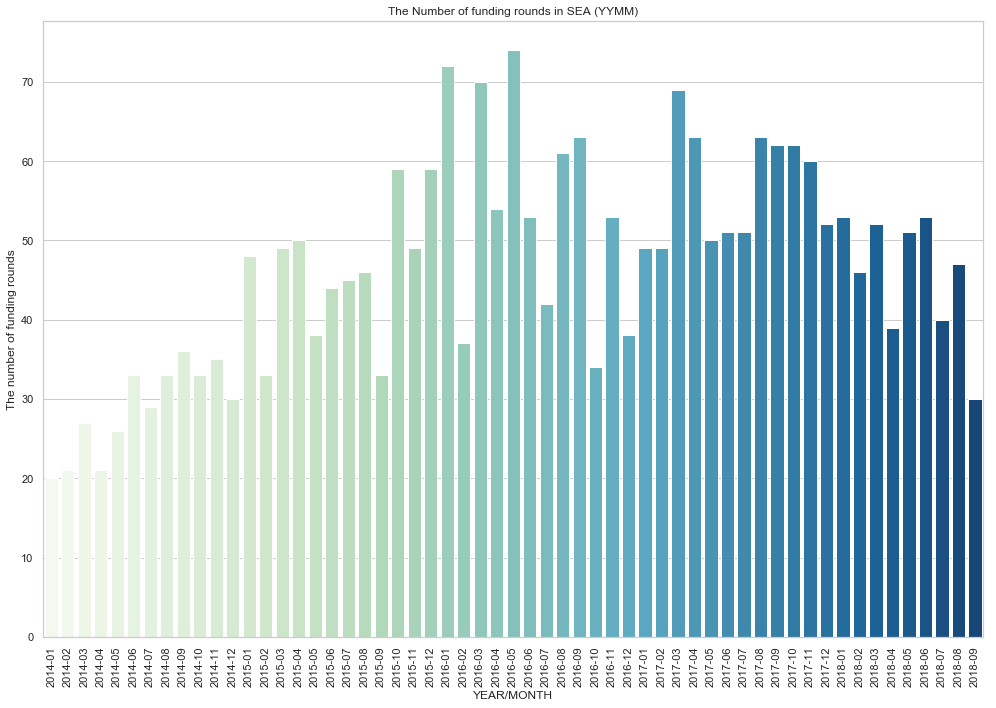

In [11]:
g1 = plt.figure(figsize=(14,10))
g1 = sns.barplot(x= group_yr_m.index, y='counts',data=group_yr_m,palette="GnBu")

# figure settings
g1.set_title("The Number of funding rounds in SEA (YYMM)")
g1.set_xlabel("YEAR/MONTH"); g1.set_ylabel("The number of funding rounds")
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

# save figure
plt.tight_layout()
plt.savefig('./figures/the number of funding rounds in SEA-YYMM.png',dpi=300)

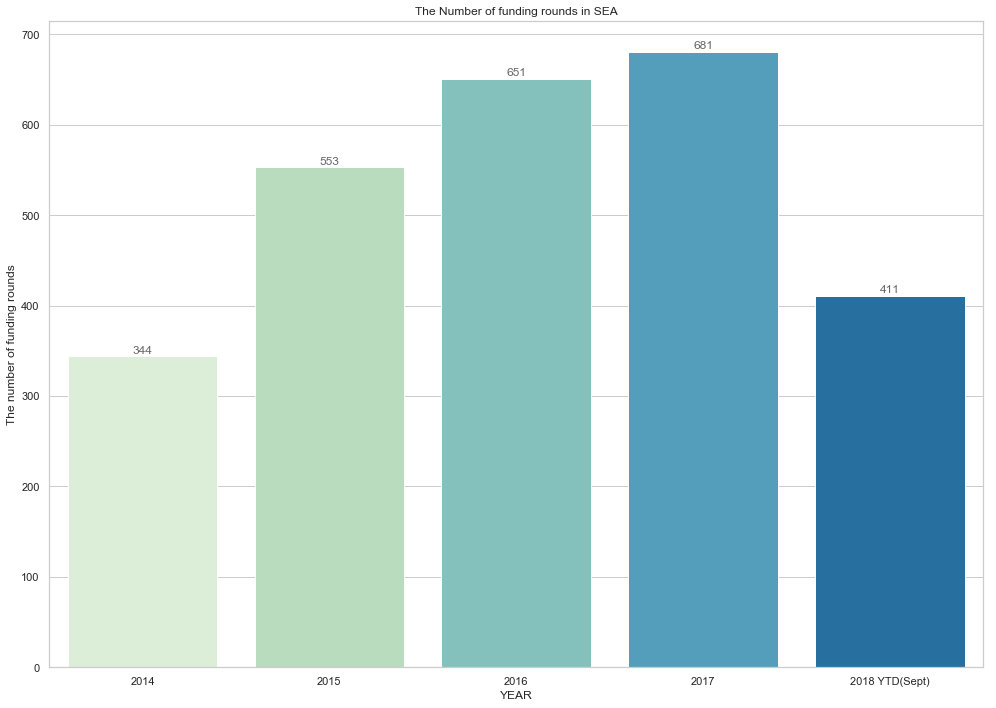

In [12]:
g2 = plt.figure(figsize=(14,10))
g2 = sns.barplot(x= group_yr.index, y='counts',data=group_yr, palette="GnBu")

# figure settings
g2.set_title("The Number of funding rounds in SEA")
g2.set_xlabel("YEAR"); g2.set_ylabel("The number of funding rounds")
# g2.set_xticklabels(g2.get_xticklabels(),rotation=0)
g2.set_xticklabels(["2014","2015","2016","2017", "2018 YTD(Sept)"],rotation=0)

# Annotations
for p in g2.patches:
    g2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), ha='center', va='bottom', alpha=0.7)
    
# for i, v in enumerate(group_yr['counts']):
#     g2.text(v/100-2, i,  str(v), color='blue', fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/The Number of funding rounds in SEA-Year.png',dpi=300)

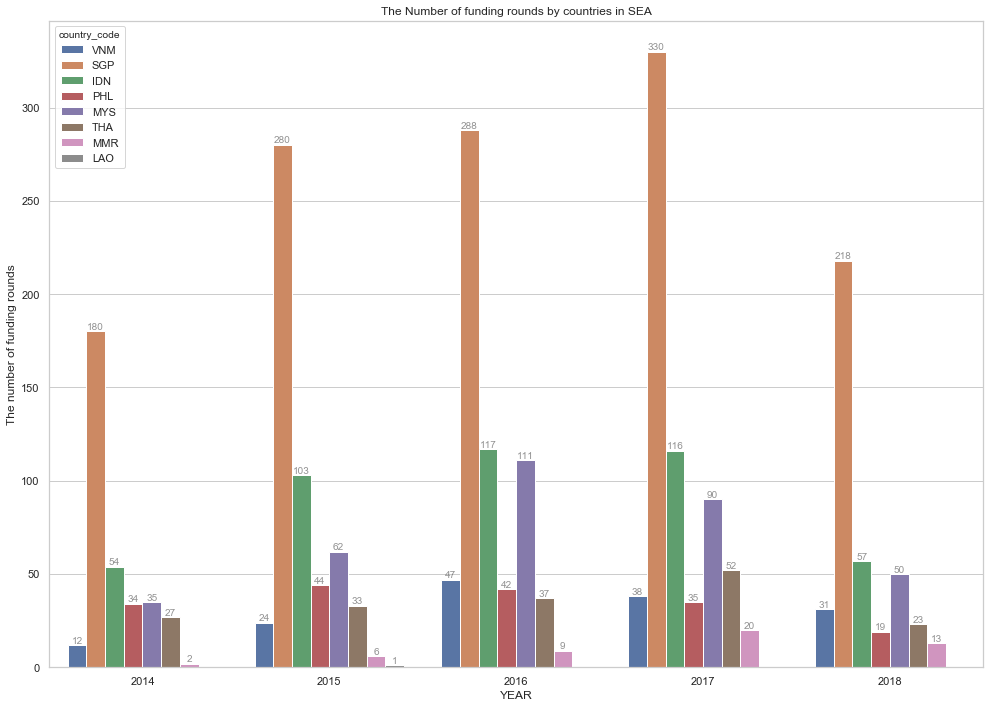

In [13]:
# CountPlot
# https://datascienceplus.com/seaborn-categorical-plots-in-python/

g3=plt.figure(figsize=(14,10))
g3 = sns.countplot(x= 'announced_on_Y', hue='country_code', data=raw_funding)

# figure settings
g3.set_title("The Number of funding rounds by countries in SEA")
g3.set_xlabel("YEAR"); g3.set_ylabel("The number of funding rounds")
g3.set_xticklabels(g3.get_xticklabels(),rotation=0)

# Annotations
for p in g3.patches:
    g3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1), fontsize=10, ha='center', alpha=0.5)
    
plt.tight_layout()
plt.savefig('./figures/funding rounds by countries.png',dpi=300)

Or, alternatively, can be presented in lineplot() / pointplot()

note: line for increased number in funding rounds from 2016 to 2017, otherwise dotted-line


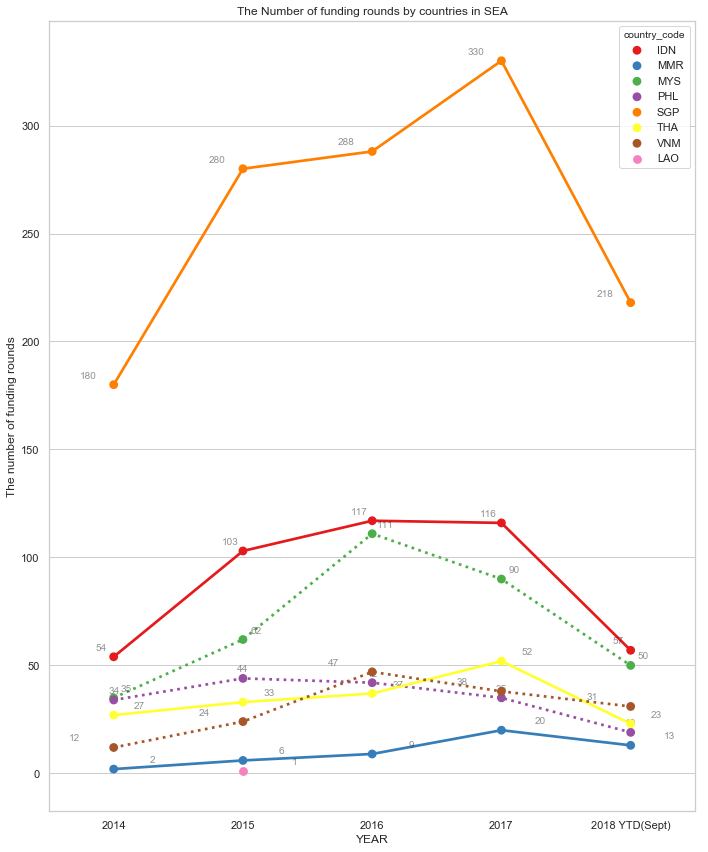

In [14]:
# create relevant group
group_by_country =raw_funding.groupby(['announced_on_Y','country_code']).size().reset_index(name='count')
# sns.lineplot(x= 'announced_on_Y',y='count',hue='country_code', markers="x", data = group_by_country )


g3_2 = plt.figure(figsize=(10,12))
g3_2 = sns.pointplot(x= 'announced_on_Y',y='count', hue='country_code', data = group_by_country,
                     markers='o', linestyles=['-','-',':',':','-','-',':',':'],palette='Set1' )
print ("note: line for increased number in funding rounds from 2016 to 2017, otherwise dotted-line")

# figure settings
g3_2.set_title("The Number of funding rounds by countries in SEA")
g3_2.set_xlabel("YEAR"); g3_2.set_ylabel("The number of funding rounds")
# g3_2.set_xticklabels(g3_2.get_xticklabels(),rotation=0)
g3_2.set_xticklabels(["2014","2015","2016","2017", "2018 YTD(Sept)"],rotation=0)

# Annotations
for p in g3.patches:
    g3_2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+3), fontsize=10, ha='center', alpha=0.5)
    
plt.tight_layout()
plt.savefig('./figures/funding rounds by countries-line.png',dpi=300)

# 2. Analysis on [the number of funding rounds] by [Investment Type/Stage] 

investment_type categories: 
 ['seed' 'private_equity' 'series_a' 'angel' 'series_unknown' 'undisclosed'
 'series_b' 'series_c' 'series_d' 'convertible_note' 'debt_financing'
 'series_h' 'series_e' 'series_f' 'corporate_round' 'series_g' 'pre_seed']
 - Invesments by original group categories:
 
    announced_on_Y   investment_type  count
0            2014             angel     36
1            2014  convertible_note      6
2            2014    debt_financing      5
3            2014    private_equity      4
4            2014              seed    177
5            2014          series_a     38
6            2014          series_b     16
7            2014          series_c      4
8            2014          series_d      3
9            2014          series_e      1 
 ......  
     announced_on_Y investment_type  count
64            2018            seed    159
65            2018        series_a     57
66            2018        series_b     31
67            2018        series_c     13
68      

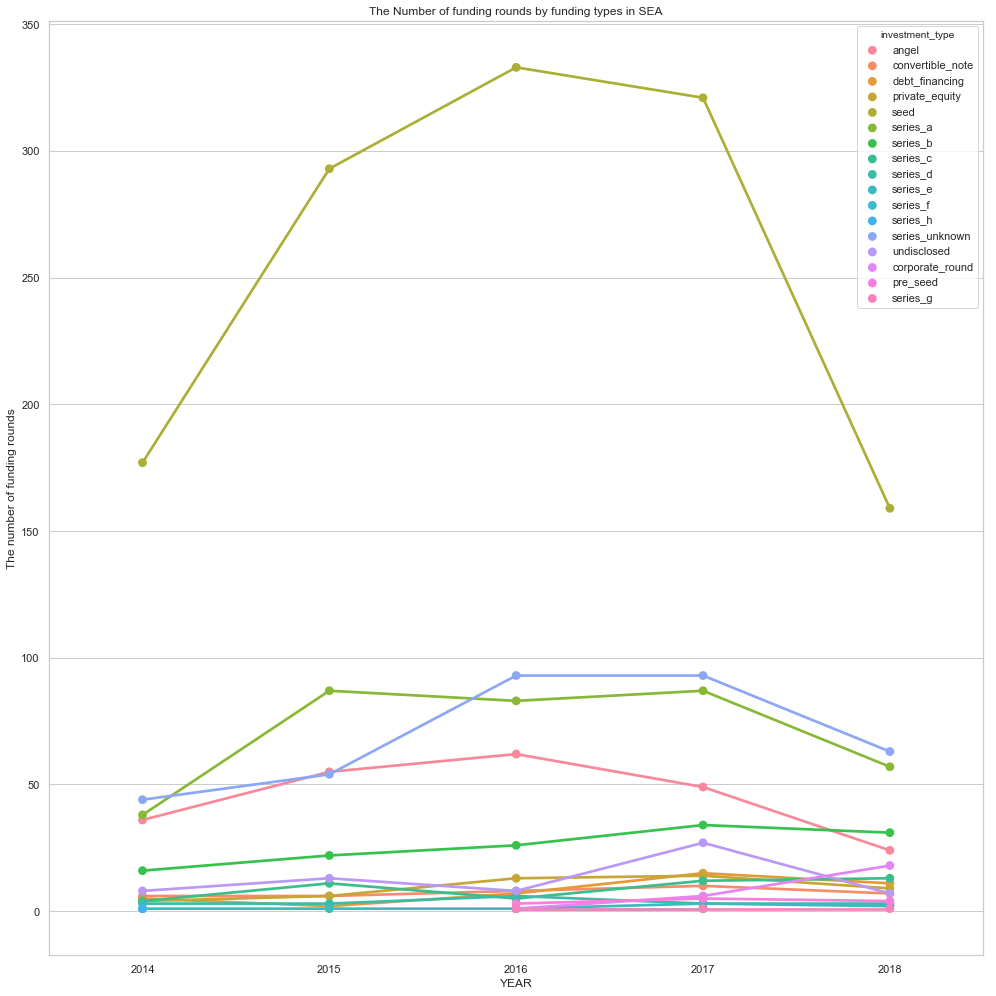

In [15]:
""" Investment Type Analysis (1)"""
# investment types
print ("investment_type categories: \n", raw_funding['investment_type'].unique())

# group by investment type
group_invest_type = raw_funding.groupby(['announced_on_Y', 'investment_type']).size().reset_index(name='count')
print(" - Invesments by original group categories:\n \n", group_invest_type.head(10), '\n ......  \n', group_invest_type.tail(10))

# Plotting
g4=plt.figure(figsize=(14,14))
# g4 = sns.countplot(x= 'announced_on_Y', hue='investment_type', data=raw_funding,
#                   hue_order = ["angel","pre_seed", "seed",
#                                "series_a","series_b","series_c","series_d","series_e",
#                                "series_f","series_g","series_h","series_unknown","undisclosed"
#                                ,"private_equity","convertible_note","deb_financing", "corporate_round"
#                               ])

g4=sns.pointplot(x= 'announced_on_Y', y = 'count',  hue='investment_type', data=group_invest_type,
                 markers='o') 

# figure settings
g4.set_title("The Number of funding rounds by funding types in SEA")
g4.set_xlabel("YEAR"); g4.set_ylabel("The number of funding rounds")
g4.set_xticklabels(g4.get_xticklabels(),rotation=0)

plt.tight_layout()


if False:
    "Alternative way to present"
    g5 = plt.figure()
    g5 = sns.catplot(x= 'announced_on_Y', hue='investment_type',col= 'country_code',
                     data=raw_funding, kind = 'count', height=4, aspect=1 )

Since the invesment type are messy, let's narrow down to the fewer groups ** ['angel', 'seed', 'series_a','series_b','series_c', 'series_later_than_c', 'unknown', 'others', 'corporate_round'] **

- recategorized investment type table: 
      announced_on_Y   investment_type  count
0             2014  angel_n_pre_seed     36
1             2014        late_stage     10
2             2014            others     15
3             2014              seed    177
4             2014          series_a     38
5             2014          series_b     16
6             2014       undisclosed     52
7             2015  angel_n_pre_seed     55
8             2015        late_stage     15
9             2015            others     14
10            2015              seed    293
11            2015          series_a     87
12            2015          series_b     22
13            2015       undisclosed     67
14            2016  angel_n_pre_seed     65
15            2016        late_stage     14
16            2016            others     29
17            2016              seed    333
18            2016          series_a     83
19            2016          series_b     26
20            2016       undisclos

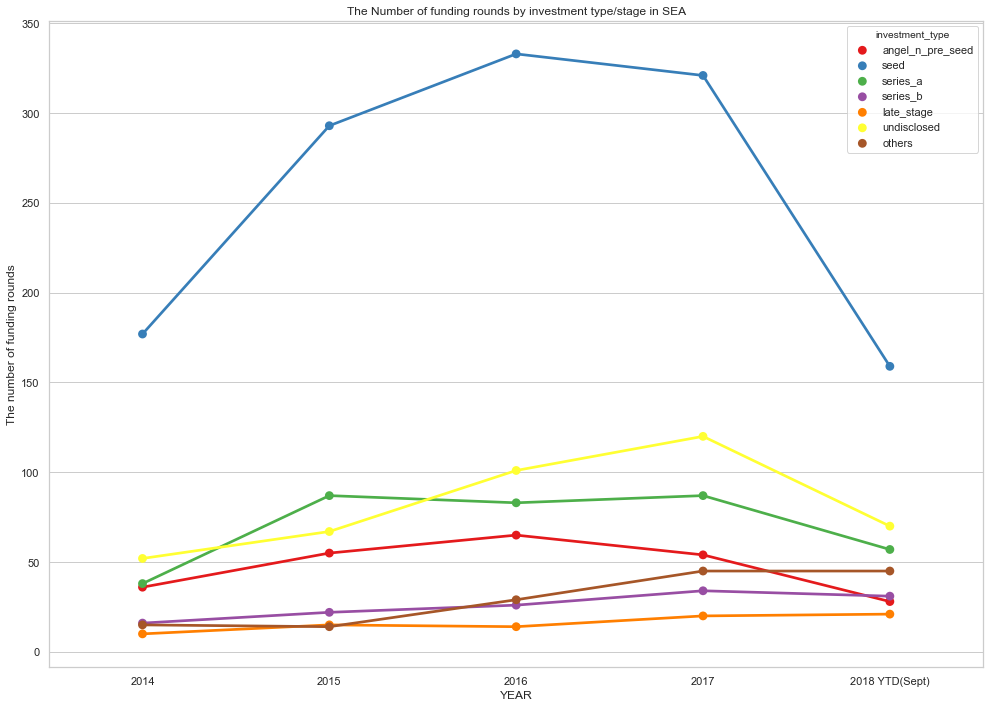

In [16]:
""" Investment Type Analysis (2) with new grouping """

"""Create new investment type categories: 

'pre_seed', 'seed' ==> 'seed' 
'angel','series_a','series_b ==> as they are
'series_c', 'series_d','series_h','series_e','series_f',  'series_g' ==> 'late_stage'

'corporate_round', 'private_equity','convertible_note' ,'debt_financing' ==> 'others'
'series_unknown', 'undisclosed' ==> 'undisclosed'

<< Excluded the following type of funding rounds which was conducted in the beginning >> 
'grant', 'equity_crowdfunding' ,'initial_coin_offering','post_ipo_debt',
'post_ipo_equity','secondary_market', 'product_crowdfunding','non_equity_assistance'  
 
"""

type_new = {'angel': 'angel_n_pre_seed', 'pre_seed': 'angel_n_pre_seed', 
            'series_c':'late_stage','series_d':'late_stage','series_e':'late_stage', 
            'series_f':'late_stage', 'series_g':'late_stage', 'series_h':'late_stage', 
           'corporate_round':'others', 'private_equity':'others', 'convertible_note':'others','debt_financing':'others',
            'series_unknown':'undisclosed'
           }

group_invest_type_new = raw_funding.replace({'investment_type':type_new}).groupby(['announced_on_Y', 'investment_type']).size().reset_index(name='count')
print ("- recategorized investment type table: \n ", group_invest_type_new)

# TODO ! :Plot here

""" Investment Type Analysis"""
g6 = plt.figure(figsize=(14,10))
# g6 = sns.barplot(x= 'announced_on_Y', y='count', hue='investment_type', data=group_invest_type_new, palette='Set1')
g6 = sns.pointplot(x= 'announced_on_Y', y='count', hue='investment_type', data=group_invest_type_new, palette='Set1', 
                   hue_order=["angel_n_pre_seed", "seed", "series_a", "series_b", "late_stage", "undisclosed", "others"])

# figure settings
g6.set_title("The Number of funding rounds by investment type/stage in SEA")
g6.set_xlabel("YEAR"); g6.set_ylabel("The number of funding rounds")
# g6.set_xticklabels(g6.get_xticklabels(),rotation=0)
g6.set_xticklabels(["2014","2015","2016","2017", "2018 YTD(Sept)"],rotation=0)

# g6.set_yscale('log') # logscale

# Annotations ==> 포인트는 patch에서 object 못가져오는듯.
for p in g6.patches:
    print(g6)
    g6.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), fontsize=10, ha='center', alpha=0.5)

    
plt.tight_layout()
plt.savefig('./figures/funding rounds by types.png',dpi=300)


 - recategorized investment type table, break down only by investment types: 
      investment_type  count
3              seed   1283
6       undisclosed    410
4          series_a    352
0  angel_n_pre_seed    238
2            others    148
5          series_b    129
1        late_stage     80
Rectangle(0,-0.4;238x0.8)
238.0
Rectangle(0,0.6;1283x0.8)
1283.0
Rectangle(0,1.6;352x0.8)
352.0
Rectangle(0,2.6;129x0.8)
129.0
Rectangle(0,3.6;80x0.8)
80.0
Rectangle(0,4.6;410x0.8)
410.0
Rectangle(0,5.6;148x0.8)
148.0


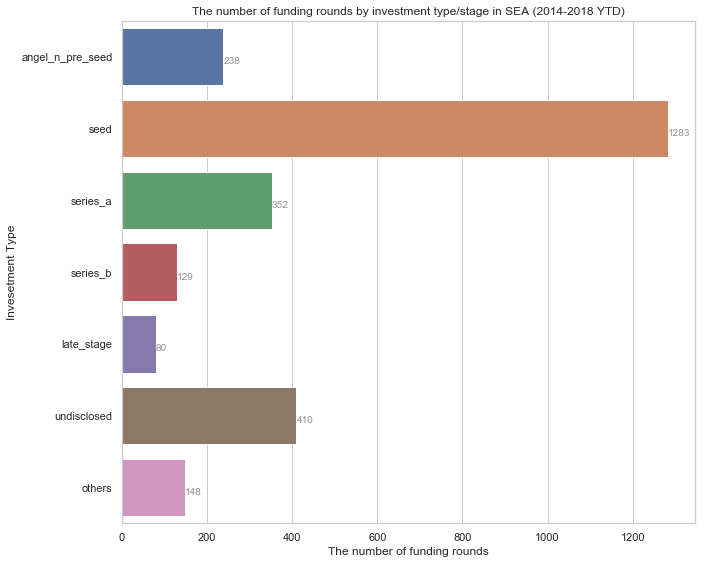

In [17]:
# rounds 
print ("\n - recategorized investment type table, break down only by investment types: \n ", 
       raw_funding.replace({'investment_type':type_new}).groupby(['investment_type']).size().reset_index(name='count').sort_values('count',ascending=False))

temp_data = raw_funding.replace({'investment_type':type_new}).groupby(['investment_type']).size().reset_index(name='count')
temp_data = temp_data.sort_values(by ='count', ascending=False)

g7 = plt.plot(figsize=(14,10))
g7 = sns.barplot(x= "count", y= "investment_type",  data=temp_data,
                 orient='h', order=["angel_n_pre_seed", "seed", "series_a", "series_b", "late_stage", "undisclosed", "others"])
# g7 = sns.barplot(x= "count", y= "investment_type",  data=temp_data,
#                  orient='h', order = temp_data['investment_type'])


# figure settings
g7.set_title("The number of funding rounds by investment type/stage in SEA (2014-2018 YTD)")
g7.set_xlabel("The number of funding rounds"); g7.set_ylabel("Invesetment Type")
# g7.set_xticklabels(g7.get_xticklabels(),rotation=0)


# Annotations
for p in g7.patches:
    print (p)
    print(p.get_width())
    g7.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+0.1, p.get_y()+0.5), fontsize=10, ha='left', alpha=0.5)


    
plt.tight_layout()
plt.savefig('./figures/funding rounds by types_5years.png',dpi=300)

# 3. Analysis on [the amount of funding rounds] by [investment type/stage, countries]

In [18]:
""" 
investment amount by years, by series 
using amended investment category
"""
# let's create new dataframe with new investment type
raw_funding_new = raw_funding.replace({'investment_type':type_new})

group_invest_amount = raw_funding_new.groupby(['announced_on_Y', 'investment_type']).describe()['raised_amount_usd']
print ("- [raised_amount_usd] by investment type: \n")
print ("- note that the number of round count doesn't match with previous due to missing values in [raised_amount_usd] \n")
# print (group_invest_amount)
# print (group_invest_amount.astype(int))

group_invest_amount.astype(int).head(10)

- [raised_amount_usd] by investment type: 

- note that the number of round count doesn't match with previous due to missing values in [raised_amount_usd] 



count      mean        std      min  \
announced_on_Y investment_type                                         
2014           angel_n_pre_seed     24    407811     712443     1000   
               late_stage            8  93338153  101357926  3000000   
               others                9  10075251   20295915    50000   
               seed                118    464580     707832     1000   
               series_a             24   3708284    4156586   500000   
               series_b             14  13607142   14903095  2000000   
               undisclosed          33  14510889   44962882    70000   
2015           angel_n_pre_seed     35    348906     608714    11000   
               late_stage           12  53608333   96204993  4000000   
               others                9  52657500   62233845    18396   

                                      25%       50%        75%        max  
announced_on_Y investment_type                                             
2014           angel_n_pre_seed     27500    125160     387385    3000000  
               late_stage        15525000  57000000  137251306  250000000  
               others              200000    400000    1250000   57500000  
               seed                 92500    250000     500000    5600000  
               series_a           1000000   1635159    5250000   16300000  
               series_b           3700000  11000000   15000000   60000000  
               undisclosed         741000   2100000    5400000  244882966  
2015           angel_n_pre_seed     60000    100000     343339    3000000  
               late_stage         7900000  26850000   38250000  350000000  
               others              849110  25000000  100000000  158000000

In [19]:
# flatten the dataframe
group_invest_amount_flat = pd.DataFrame(group_invest_amount.to_records())
group_invest_amount_flat

,announced_on_Y,investment_type,count,mean,std,min,25%,50%,75%,max
0,2014,angel_n_pre_seed,24.0,4.078113e+05,7.124432e+05,1000.0,27500.00,125160.5,3.873850e+05,3.000000e+06
1,2014,late_stage,8.0,9.333815e+07,1.013579e+08,3000000.0,15525000.00,57000000.0,1.372513e+08,2.500000e+08
2,2014,others,9.0,1.007525e+07,2.029592e+07,50000.0,200000.00,400000.0,1.250000e+06,5.750000e+07
3,2014,seed,118.0,4.645803e+05,7.078321e+05,1000.0,92500.00,250000.0,5.000000e+05,5.600000e+06
4,2014,series_a,24.0,3.708284e+06,4.156586e+06,500000.0,1000000.00,1635159.0,5.250000e+06,1.630000e+07
5,2014,series_b,14.0,1.360714e+07,1.490310e+07,2000000.0,3700000.00,11000000.0,1.500000e+07,6.000000e+07
6,2014,undisclosed,33.0,1.451089e+07,4.496288e+07,70000.0,741000.00,2100000.0,5.400000e+06,2.448830e+08
7,2015,angel_n_pre_seed,35.0,3.489068e+05,6.087148e+05,11000.0,60000.00,100000.0,3.433395e+05,3.000000e+06
8,2015,late_stage,12.0,5.360833e+07,9.620499e+07,4000000.0,7900000.00,26850000.0,3.825000e+07,3.500000e+08
9,2015,others,9.0,5.265750e+07,6.223385e+07,18396.0,849110.00,25000000.0,1.000000e+08,1.580000e+08


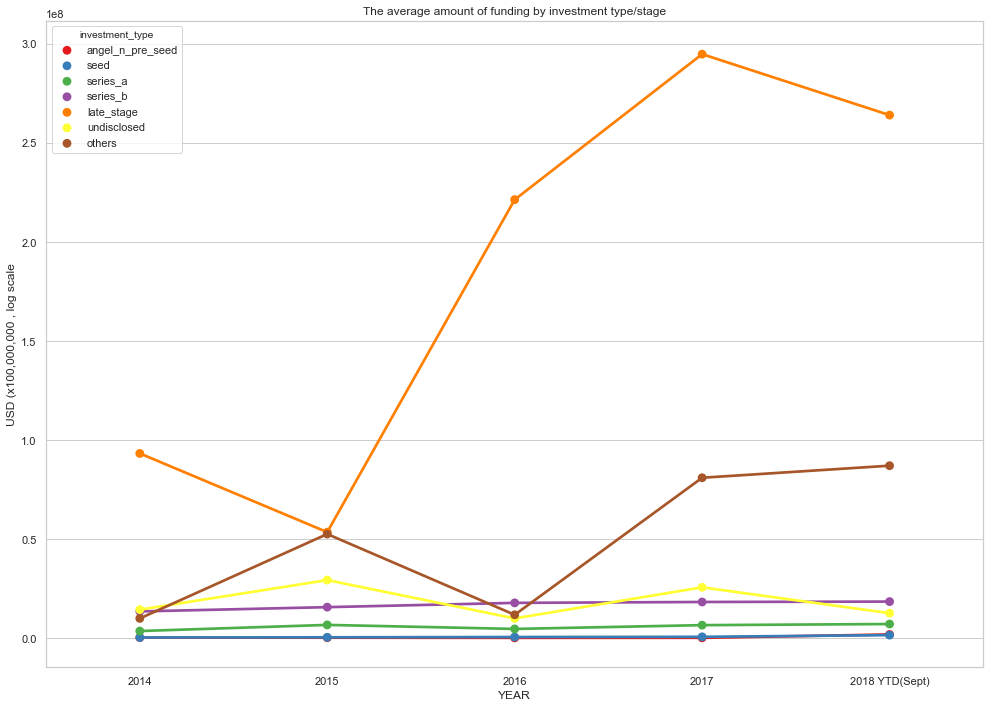

In [20]:
""" Investment Type Analysis"""
g8 = plt.figure(figsize=(14,10))
# g6 = sns.barplot(x= 'announced_on_Y', y='count', hue='investment_type', data=group_invest_type_new, palette='Set1')
g8 = sns.pointplot(x= 'announced_on_Y', y='mean', hue='investment_type', data=group_invest_amount_flat, palette='Set1', 
                   hue_order=["angel_n_pre_seed", "seed", "series_a", "series_b", "late_stage", "undisclosed", "others"]
                  )

# figure settings
g8.set_title("The average amount of funding by investment type/stage")
g8.set_xlabel("YEAR"); g8.set_ylabel("USD (x100,000,000 , log scale")
# g8.set_xticklabels(g8.get_xticklabels(),rotation=0)
g8.set_xticklabels(["2014","2015","2016","2017", "2018 YTD(Sept)"],rotation=0)
# g8.set_yscale('log') # logscale

# # Annotations ==> 포인트는 patch에서 object 못가져오는듯.
# for p in g6.patches:
#     print(g6)
#     g6.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), fontsize=10, ha='center', alpha=0.5)
      

plt.tight_layout()
plt.savefig('./figures/funding amount by types.png',dpi=300)



breakdown the funding amount by more detailed funding types: 

In [21]:
# let's create new dataframe with new investment type

group_invest_amount_detail = raw_funding.groupby(['announced_on_Y', 'investment_type']).describe()['raised_amount_usd']
print ("- [raised_amount_usd] by investment type: \n")
print ("- note that the number of round count doesn't match with previous due to missing values in [raised_amount_usd] \n")
# print (group_invest_amount)
# print (group_invest_amount.astype(int))

group_invest_amount_detail.head(14)

- [raised_amount_usd] by investment type: 

- note that the number of round count doesn't match with previous due to missing values in [raised_amount_usd] 



count          mean           std  \
announced_on_Y investment_type                                       
2014           angel              24.0  4.078113e+05  7.124432e+05   
               convertible_note    5.0  3.454532e+05  3.676169e+05   
               debt_financing      2.0  7.250000e+05  7.424621e+05   
               private_equity      2.0  4.375000e+07  1.944544e+07   
               seed              118.0  4.645803e+05  7.078321e+05   
               series_a           24.0  3.708284e+06  4.156586e+06   
               series_b           14.0  1.360714e+07  1.490310e+07   
               series_c            3.0  2.790000e+07  3.275103e+07   
               series_d            2.0  1.325000e+08  1.661701e+08   
               series_e            1.0  1.000000e+08           NaN   
               series_f            1.0  2.490052e+08           NaN   
               series_h            1.0  4.900000e+07           NaN   
               series_unknown     28.0  4.381335e+06  6.180002e+06   
               undisclosed         5.0  7.123639e+07  1.057119e+08   

                                         min          25%          50%  \
announced_on_Y investment_type                                           
2014           angel                  1000.0      27500.0     125160.5   
               convertible_note      50000.0     100000.0     220000.0   
               debt_financing       200000.0     462500.0     725000.0   
               private_equity     30000000.0   36875000.0   43750000.0   
               seed                   1000.0      92500.0     250000.0   
               series_a             500000.0    1000000.0    1635159.0   
               series_b            2000000.0    3700000.0   11000000.0   
               series_c            3000000.0    9350000.0   15700000.0   
               series_d           15000000.0   73750000.0  132500000.0   
               series_e          100000000.0  100000000.0  100000000.0   
               series_f          249005224.0  249005224.0  249005224.0   
               series_h           49000000.0   49000000.0   49000000.0   
               series_unknown        70000.0     812500.0    1859646.5   
               undisclosed          320000.0     741000.0   10237983.0   

                                         75%          max  
announced_on_Y investment_type                             
2014           angel                387385.0    3000000.0  
               convertible_note     400000.0     957266.0  
               debt_financing       987500.0    1250000.0  
               private_equity     50625000.0   57500000.0  
               seed                 500000.0    5600000.0  
               series_a            5250000.0   16300000.0  
               series_b           15000000.0   60000000.0  
               series_c           40350000.0   65000000.0  
               series_d          191250000.0  250000000.0  
               series_e          100000000.0  100000000.0  
               series_f          249005224.0  249005224.0  
               series_h           49000000.0   49000000.0  
               series_unknown      4125000.0   24155347.0  
               undisclosed       100000000.0  244882966.0

In [22]:
group_invest_amount_flat_detail = pd.DataFrame(group_invest_amount_detail.to_records())
group_invest_amount_flat_detail

,announced_on_Y,investment_type,count,mean,std,min,25%,50%,75%,max
0,2014,angel,24.0,4.078113e+05,7.124432e+05,1.000000e+03,2.750000e+04,1.251605e+05,3.873850e+05,3.000000e+06
1,2014,convertible_note,5.0,3.454532e+05,3.676169e+05,5.000000e+04,1.000000e+05,2.200000e+05,4.000000e+05,9.572660e+05
2,2014,debt_financing,2.0,7.250000e+05,7.424621e+05,2.000000e+05,4.625000e+05,7.250000e+05,9.875000e+05,1.250000e+06
3,2014,private_equity,2.0,4.375000e+07,1.944544e+07,3.000000e+07,3.687500e+07,4.375000e+07,5.062500e+07,5.750000e+07
4,2014,seed,118.0,4.645803e+05,7.078321e+05,1.000000e+03,9.250000e+04,2.500000e+05,5.000000e+05,5.600000e+06
5,2014,series_a,24.0,3.708284e+06,4.156586e+06,5.000000e+05,1.000000e+06,1.635159e+06,5.250000e+06,1.630000e+07
6,2014,series_b,14.0,1.360714e+07,1.490310e+07,2.000000e+06,3.700000e+06,1.100000e+07,1.500000e+07,6.000000e+07
7,2014,series_c,3.0,2.790000e+07,3.275103e+07,3.000000e+06,9.350000e+06,1.570000e+07,4.035000e+07,6.500000e+07
8,2014,series_d,2.0,1.325000e+08,1.661701e+08,1.500000e+07,7.375000e+07,1.325000e+08,1.912500e+08,2.500000e+08
9,2014,series_e,1.0,1.000000e+08,NaN,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08


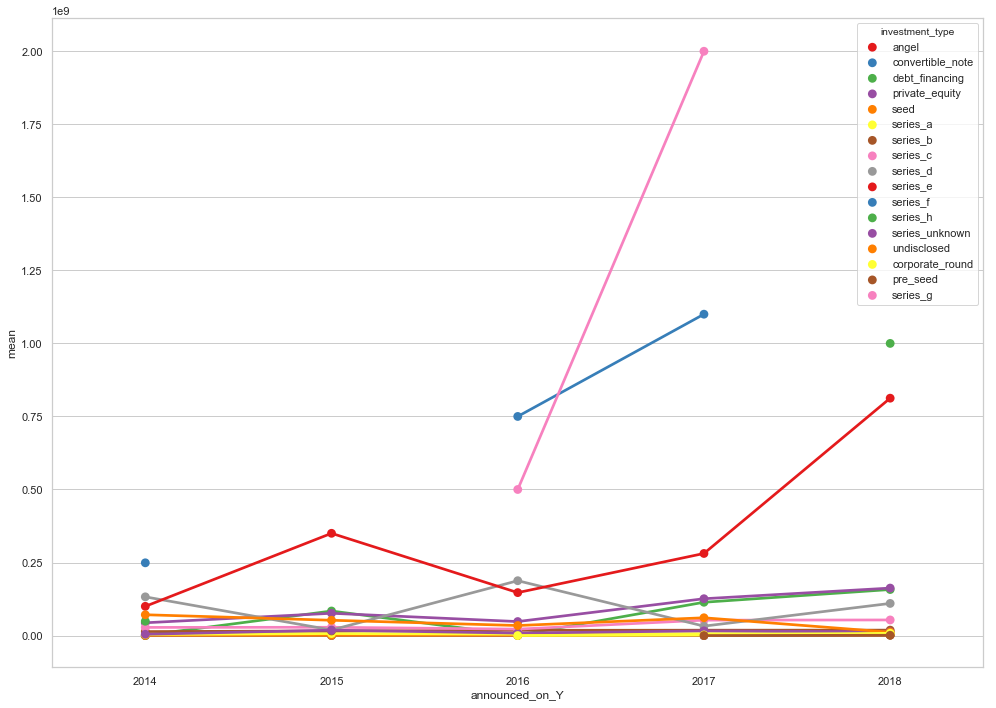

In [23]:
""" Investment Type Analysis"""
g9 = plt.figure(figsize=(14,10))
# g6 = sns.barplot(x= 'announced_on_Y', y='count', hue='investment_type', data=group_invest_amount_flat_detail, palette='Set1')
g9 = sns.pointplot(x= 'announced_on_Y', y='mean', hue='investment_type', data=group_invest_amount_flat_detail, palette='Set1', 
#                    hue_order=["angel_n_pre_seed", "seed", "series_a", "series_b", "late_stage", "undisclosed", "others"]
                  )

# # figure settings
# g8.set_title("The average amount of funding by investment type/stage")
# g8.set_xlabel("YEAR"); g8.set_ylabel("USD (x100,000,000 , log scale")
# # g8.set_xticklabels(g8.get_xticklabels(),rotation=0)
# g8.set_xticklabels(["2014","2015","2016","2017", "2018 YTD(Sept)"],rotation=0)
# # g8.set_yscale('log') # logscale

# # # Annotations ==> 포인트는 patch에서 object 못가져오는듯.
# # for p in g6.patches:
# #     print(g6)
# #     g6.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), fontsize=10, ha='center', alpha=0.5)
      

plt.tight_layout()
plt.savefig('./figures/funding amount by types_detail.png',dpi=300)

### - Median/ Sum/ Mean of Investment amount : 

In [24]:
"""break down by simply years"""
# group_invest_amount_year = raw_funding_new.groupby(['announced_on_Y']).describe()['raised_amount_usd']
df1 = raw_funding_new.groupby(['announced_on_Y']).median()['raised_amount_usd'].reset_index(name='median')
df2 = raw_funding_new.groupby(['announced_on_Y']).sum()['raised_amount_usd'].reset_index(name='sum')
df3 = raw_funding_new.groupby(['announced_on_Y']).mean()['raised_amount_usd'].reset_index(name='mean')

df12 = pd.merge(df1, df2, on='announced_on_Y')
raw_funding_new_by_year = pd.merge(df12,df3, on ='announced_on_Y' )
raw_funding_new_by_year.astype(int)

,announced_on_Y,median,sum,mean
0,2014,500000,1660348600,7218906
1,2015,600000,2735998727,8142853
2,2016,649286,3555257896,9116045
3,2017,1100000,8962144575,22461515
4,2018,2000000,8234919901,32042489


### - top 30 funding rounds by amount of a round

In [36]:
""" biggest funding rounds for 5 years """
df_temp = raw_funding.sort_values(by ='raised_amount_usd', ascending=False).head(30)
df_temp.raised_amount_usd = df_temp.raised_amount_usd.astype(int)

# copy data frame to clipbaord, compatible with excel sheet
df_temp.to_clipboard(excel=True,sep='\t')
df_temp

,company_name,country_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,investor_count,company_uuid,funding_round_uuid,investor_names,investor_uuids,announced_on_Y-M,announced_on_Y
2088,Grab,SGP,Singapore,Midview City,series_g,2017-07-24,2000000000,NaN,NaN,6.000000e+09,NaN,NaN,3.0,a7682476-8a83-dbcf-73dc-41a841ef850e,71c54a8b-1ba0-55c2-fb8e-6d7486c5e8a8,"{""Didi Chuxing"",SoftBank}","{eab915a8-f414-64e0-5138-c5f341596a5b,1a410398...",2017-07,2017
2542,Go-Jek,IDN,Jakarta,Jakarta,series_e,2018-02-12,1500000000,NaN,NaN,5.000000e+09,NaN,NaN,11.0,75e047db-0f70-b7de-31b9-95633b2be2be,0ef2f269-8315-9b7e-2c99-79eca0b8eaa2,"{""Tencent Holdings""}",{3cae090b-ed2d-95f8-79a9-e32ca480258f},2018-02,2018
2139,Tokopedia,IDN,Jakarta,Jakarta,series_f,2017-08-17,1100000000,NaN,NaN,NaN,NaN,NaN,1.0,e149e6c5-0fab-1f99-f9b8-15adab658e2f,5d3c4aab-e7e9-d1b0-5d6e-832aafb9ee6b,{Alibaba},{17d626a7-27a7-a51b-9337-3839f8ed055e},2017-08,2017
2773,Grab,SGP,Singapore,Midview City,series_h,2018-06-12,1000000000,NaN,NaN,1.000000e+10,NaN,NaN,2.0,a7682476-8a83-dbcf-73dc-41a841ef850e,916e8941-64c6-495a-8e82-771963109e0f,"{""Toyota Motor Corporation""}",{12b90373-ab49-a56a-4b4e-c7b3e9236faf},2018-06,2018
2853,Grab,SGP,Singapore,Midview City,series_h,2018-08-01,1000000000,NaN,NaN,1.100000e+10,NaN,NaN,9.0,a7682476-8a83-dbcf-73dc-41a841ef850e,522b332c-d033-46b9-9fd7-24b42bd1dcba,"{""Toyota Motor Corporation""}",{12b90373-ab49-a56a-4b4e-c7b3e9236faf},2018-08,2018
1491,Grab,SGP,Singapore,Midview City,series_f,2016-09-19,750000000,NaN,NaN,3.050000e+09,NaN,NaN,2.0,a7682476-8a83-dbcf-73dc-41a841ef850e,3c4dbbd5-c176-cde6-b5d3-e8eedae5c699,{SoftBank},{1a410398-3a72-5882-99b8-6318cf594850},2016-09,2016
2293,Grab,SGP,Singapore,Midview City,debt_financing,2017-10-20,700000000,NaN,NaN,NaN,NaN,NaN,1.0,a7682476-8a83-dbcf-73dc-41a841ef850e,5c311a2a-20c1-4379-b453-db81a38a2143,{HSBC},{8ee63939-bd06-6699-f575-dffcecb71daf},2017-10,2017
2878,AirTrunk,SGP,Singapore,Singapore,debt_financing,2018-08-20,623594161,850000000.0,AUD,NaN,NaN,NaN,2.0,b3758fbe-21b4-c298-9493-e1a2dcc109d9,1f03e4dc-18d3-499e-b641-6ee8c84f0c65,"{""Goldman Sachs""}",{30b3efdf-6024-804d-ea55-c4d1a8dfc86c},2018-08,2018
1940,Sea,SGP,Singapore,Singapore,series_e,2017-05-08,550000000,NaN,NaN,NaN,NaN,NaN,6.0,2f7c7a12-207f-7cb8-a075-4931d0959dca,5f52e2d3-fa34-5398-bd93-7ec61d60aca7,{},{},2017-05,2017
1405,Go-Jek,IDN,Jakarta,Jakarta,series_d,2016-08-04,550000000,NaN,NaN,1.300000e+09,NaN,NaN,10.0,75e047db-0f70-b7de-31b9-95633b2be2be,ff58b3f3-2222-8425-dce8-21b1f9abb8d4,"{""KKR & Co. (Kohlberg Kravis Roberts & Co.)"",""...","{6c93ebd7-3558-5603-daaf-074652d0e1bb,8c5ff693...",2016-08,2016


### """ todo: investment amount, numbers, by sectors"""

- bubble chart : funding types(x), avg. funding numbers (y), avg. amount (size of the bubble), 
- bubble chart : funding year(x), avg. funding numbers (y), avg. amount ( size of the bubble), 

In [26]:

if False:
    "bubble chart with respect to count/mean"
    g8 = sns.scatterplot(x= "announced_on_Y", y="count",
                         hue= "investment_type", 
                         size="mean",
    #                      palette=cmap, 
                         sizes=(500, 2000),
                         data=group_invest_amount_flat)

# 4.  Sector Analysis

In [27]:
sea_org = pd.read_csv('./sea_organizations-20180927.csv')
print (sea_org.columns)
sea_org.head(3)

Index(['company_name', 'roles', 'permalink', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address', 'status',
       'short_description', 'category_list', 'category_group_list',
       'funding_rounds', 'funding_total_usd', 'founded_on', 'last_funding_on',
       'closed_on', 'employee_count', 'aliases', 'uuid', 'created_at',
       'updated_at', 'primary_role', 'type'],
      dtype='object')


,company_name,roles,permalink,domain,homepage_url,country_code,state_code,region,city,address,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,closed_on,employee_count,aliases,uuid,created_at,updated_at,primary_role,type
0,Apindo Karya Lestari,company,/organization/apindo-karya-lestari,apindokl.co.id,https://www.apindokl.co.id/,IDN,NaN,Tangerang,Tangerang,"Komp. Ruko Serpong 1 Cilenggang, No.17-A",operating,Jasa epoxy lantai jakarta,Industrial Manufacturing,Manufacturing,1,NaN,1987-02-02,1987-02-02,NaN,11-50,NaN,7811358c-0393-4190-b9f4-9dfe5cdce7d1,2018-04-27 12:09:11,2018-08-09 07:13:00,company,organization
1,Asia Renal Care,company,/organization/asia-renal-care,fmc-sg.com,http://www.fmc-sg.com,SGP,NaN,Singapore,Singapore,"238A Thomson Road, #23-02/05, Novena Square To...",operating,Asia Renal Care is the largest integrated that...,Health Care,Health Care,1,NaN,NaN,1997-06-05,NaN,501-1000,NaN,39505aea-736d-a2ce-6794-061e51e775ab,2013-12-03 17:19:32,2018-08-08 09:57:01,company,organization
2,Memstar,company,/organization/memstar,memstar.com.sg,http://www.memstar.com.sg/,SGP,NaN,Singapore,Singapore,11 Kian Teck Drive,ipo,Memstar specializes in the research and develo...,"Developer Tools,Enterprise Software,Manufacturing","Manufacturing,Software",1,NaN,1990-01-01,1998-06-01,NaN,11-50,NaN,c17c72ac-34c4-d5f7-176d-3e5c64431ae8,2015-11-20 08:53:09,2018-07-07 06:04:35,company,organization


In [28]:
COL_org = ['company_name','country_code','category_list','category_group_list','funding_rounds','funding_total_usd','founded_on','employee_count','uuid']
# sea_org.drop( xxx,axis=1,inplace=True)
sea_org = sea_org[COL_org]
sea_org.head()

,company_name,country_code,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,employee_count,uuid
0,Apindo Karya Lestari,IDN,Industrial Manufacturing,Manufacturing,1,NaN,1987-02-02,11-50,7811358c-0393-4190-b9f4-9dfe5cdce7d1
1,Asia Renal Care,SGP,Health Care,Health Care,1,NaN,NaN,501-1000,39505aea-736d-a2ce-6794-061e51e775ab
2,Memstar,SGP,"Developer Tools,Enterprise Software,Manufacturing","Manufacturing,Software",1,NaN,1990-01-01,11-50,c17c72ac-34c4-d5f7-176d-3e5c64431ae8
3,IDEAglobal,SGP,"Financial Services,Market Research,Risk Manage...","Data and Analytics,Design,Financial Services",1,NaN,1989-01-01,51-100,4c2ef09a-8e64-ca3b-6ce5-ad4200f9c339
4,Adventa,MYS,"Manufacturing,Medical,Medical Device","Health Care,Manufacturing",1,NaN,NaN,5001-10000,5e67043a-dc31-716b-1f32-a28d9e6651c3


In [29]:
raw_funding.head(2)

,company_name,country_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,investor_count,company_uuid,funding_round_uuid,investor_names,investor_uuids,announced_on_Y-M,announced_on_Y
0,Ahometo,VNM,Ho Chi Minh,Ho Chi Minh City,seed,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d991b12f-bd4a-e6eb-b4d4-3365ecf0384e,08d65107-9e21-9a4b-c06f-268236904223,{},{},2014-01,2014
1,Healint,SGP,NaN,NaN,seed,2014-01-04,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,2a726f19-bb36-5ca4-6531-b422971e24f5,efe6ef75-4fbe-47c9-2980-63aad31a11ac,{},{},2014-01,2014


##  - todo: join the table and count baesd on category

# Summary
### 1. Number analysis on funding rounds: 
* number of funding rounds by year

In [30]:
group_yr

,counts
2014,344
2015,553
2016,651
2017,681
2018,411


# Methodology

### - Integrity of the Data

* Time Coverage: 2014 - 2018 YTD (SEPT 27)
* Countries: Singapore, Indonesia, Vietnam, Thailand, Philippines, Malaysia, Myanmar, Laos 
* The total number of SEA companies on crunchbase: 9,016
* The number of funding rounds: 2,903
* The number of unique companies who did funding rounds: 1,872
* NaNs in funding amount: 1,086 (37.41% are missing values)
* NaNs in investors: 820

In [31]:
print(len(raw_funding))
print(len(raw_funding.company_uuid.unique()))
# Missing values
print(raw_funding.country_code.isnull().sum())
print(raw_funding.announced_on.isnull().sum())
print("missing values in funding amount: %d, %.2f %%" \
      % (raw_funding.raised_amount_usd.isnull().sum(), (raw_funding.raised_amount_usd.isnull().sum())/len(raw_funding)*100))
print(raw_funding.investor_count.isnull().sum())

2640
1741
0
0
missing values in funding amount: 1028, 38.94 %
709


### - What excluded:
* non-equity funding: ['grant' 'equity_crowdfunding' ,'initial_coin_offering','post_ipo_debt','post_ipo_equity','secondary_market', 'product_crowdfunding','non_equity_assistance']  

# Tips: 
1. gropby operation: 

In [32]:
""" Tips:  Groupby operations examples: """
# raw_funding['investment_type'].groupby(raw_funding['announced_on_Y']).describe()
# raw_funding['announced_on_Y'].groupby(raw_funding['investment_type']).describe()
# raw_funding.groupby(['announced_on_Y', 'investment_type']).count()


# raw_funding.groupby(['announced_on_Y', 'investment_type']).count()
# raw_funding['raised_amount_usd'].groupby(raw_funding['announced_on_Y'], raw_funding['investment_type'])
# raw_funding['raised_amount_usd'].groupby(raw_funding['investment_type']).describe()
# raw_funding['raised_amount_usd'].groupby(raw_funding['announced_on_Y']).mean()


' Tips:  Groupby operations examples: '